## credit_card dataset

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\167956595705360ec2379f8793842aa5b168a_ (2)\ML Question Paper\Datasets\credit_card.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Missing Value Treatment

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Credit Limit has only 1 row missing value so drop that row

In [7]:
missing_index=data[data['CREDIT_LIMIT'].isnull()].index.to_list()
data=data.drop(index=missing_index[0])

In [8]:
data.fillna(data["MINIMUM_PAYMENTS"].median(), inplace=True)

In [9]:
data.fillna(data["MINIMUM_PAYMENTS"].median(), inplace=True)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## check Duplicated Values

In [10]:
data.duplicated().sum()

0

#### There is no duplicated values in dataset¶

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


## Outlier Treatment¶

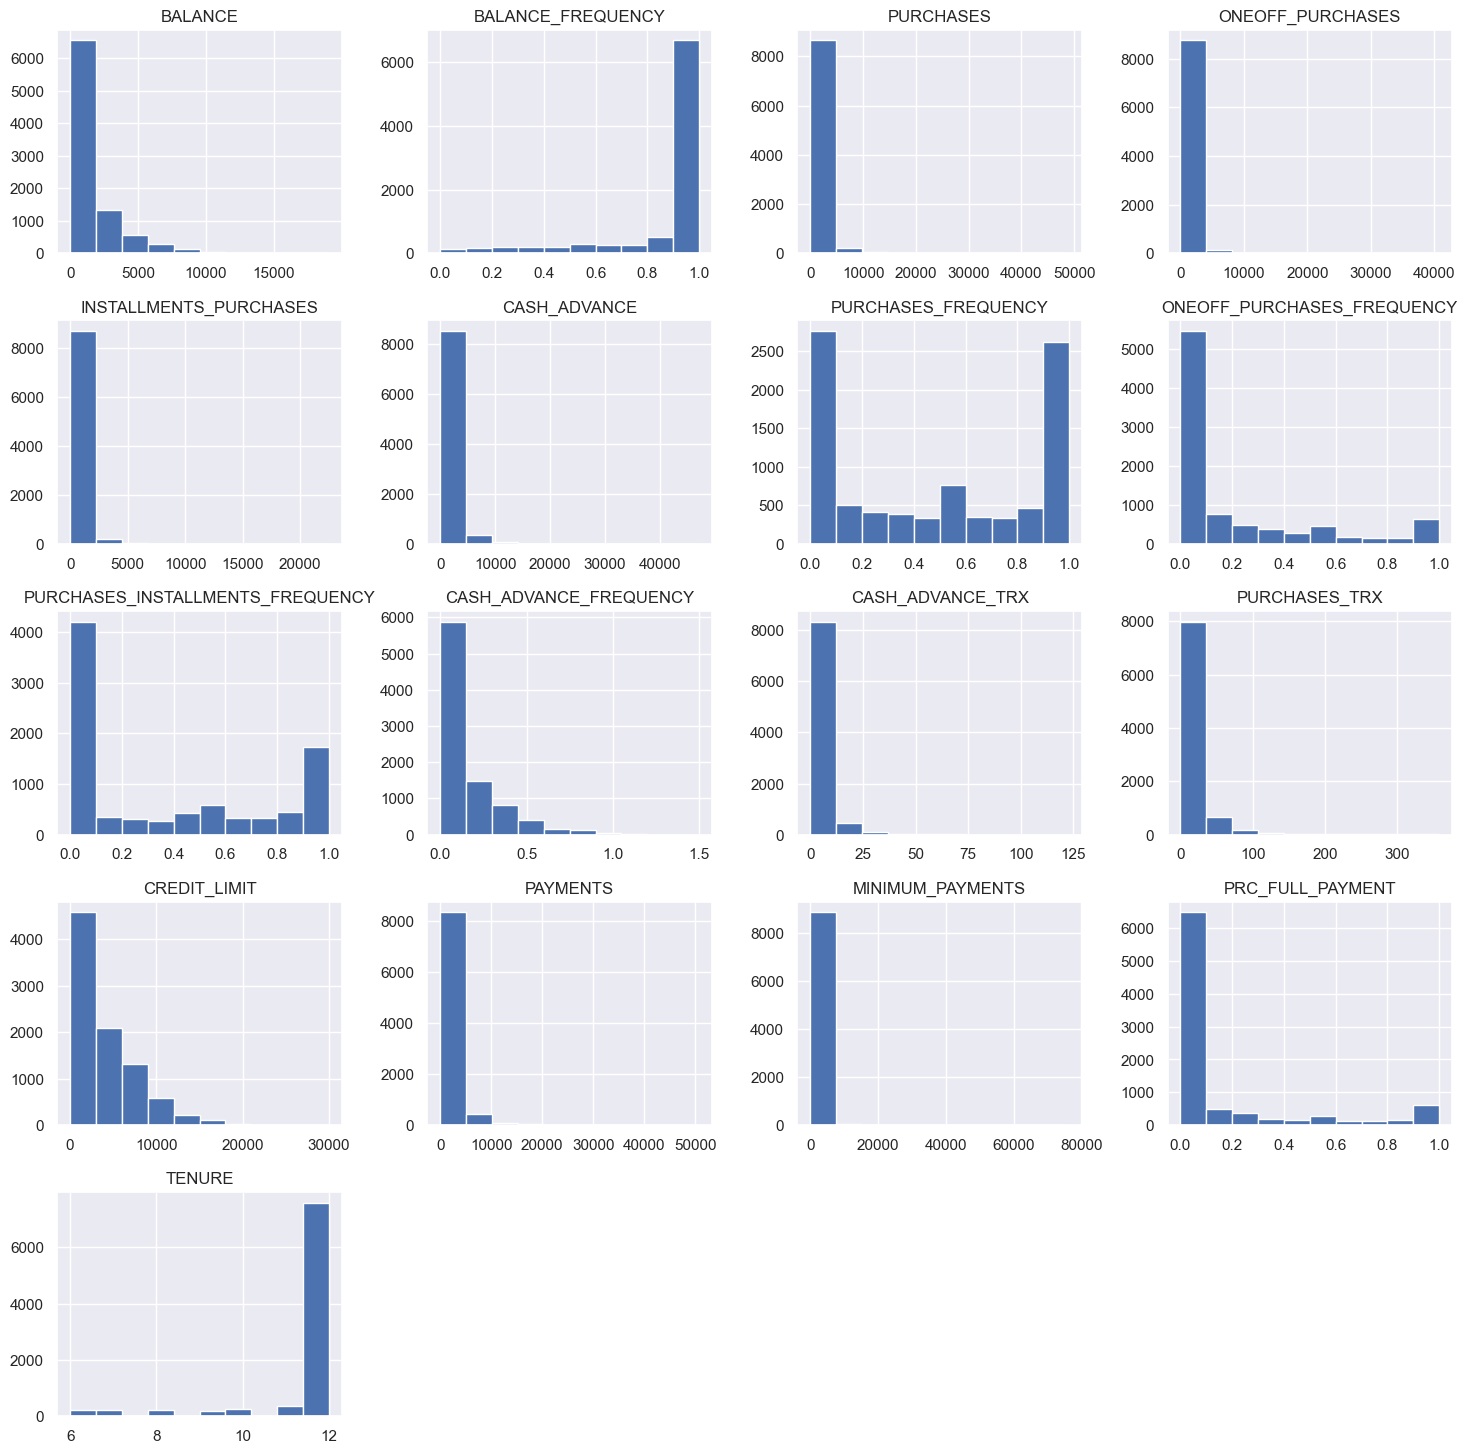

In [12]:
fig = data.hist(figsize=(18,18))

#### From above graphs we can see outliers

In [13]:
data.describe(percentiles=[0.01,.1,.25,.50,.75,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,0.065095,23.586295,128.365782,873.680279,2054.372848,9338.873258,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.090909,0.454545,0.888889,1.000000,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,0.000000,0.000000,39.800000,361.490000,1110.170000,8977.910000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,0.000000,0.000000,38.000000,577.830000,6690.126400,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,0.000000,0.000000,89.000000,468.650000,3886.256000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,0.000000,0.000000,1113.868654,9588.329752,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.833333,1.50000


## Correaltion¶

In [14]:
corr=data.corr()
corr

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17180\2248884307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.397905,-0.319018,0.072421
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.131125,-0.095308,0.118566
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.095772,0.180356,0.086155
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.050242,0.132745,0.064047
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.134003,0.182548,0.086016
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.140734,-0.152961,-0.068552
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.006105,0.305761,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.027340,0.157497,0.082234
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.032020,0.250049,0.072926
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.100623,-0.249768,-0.133427


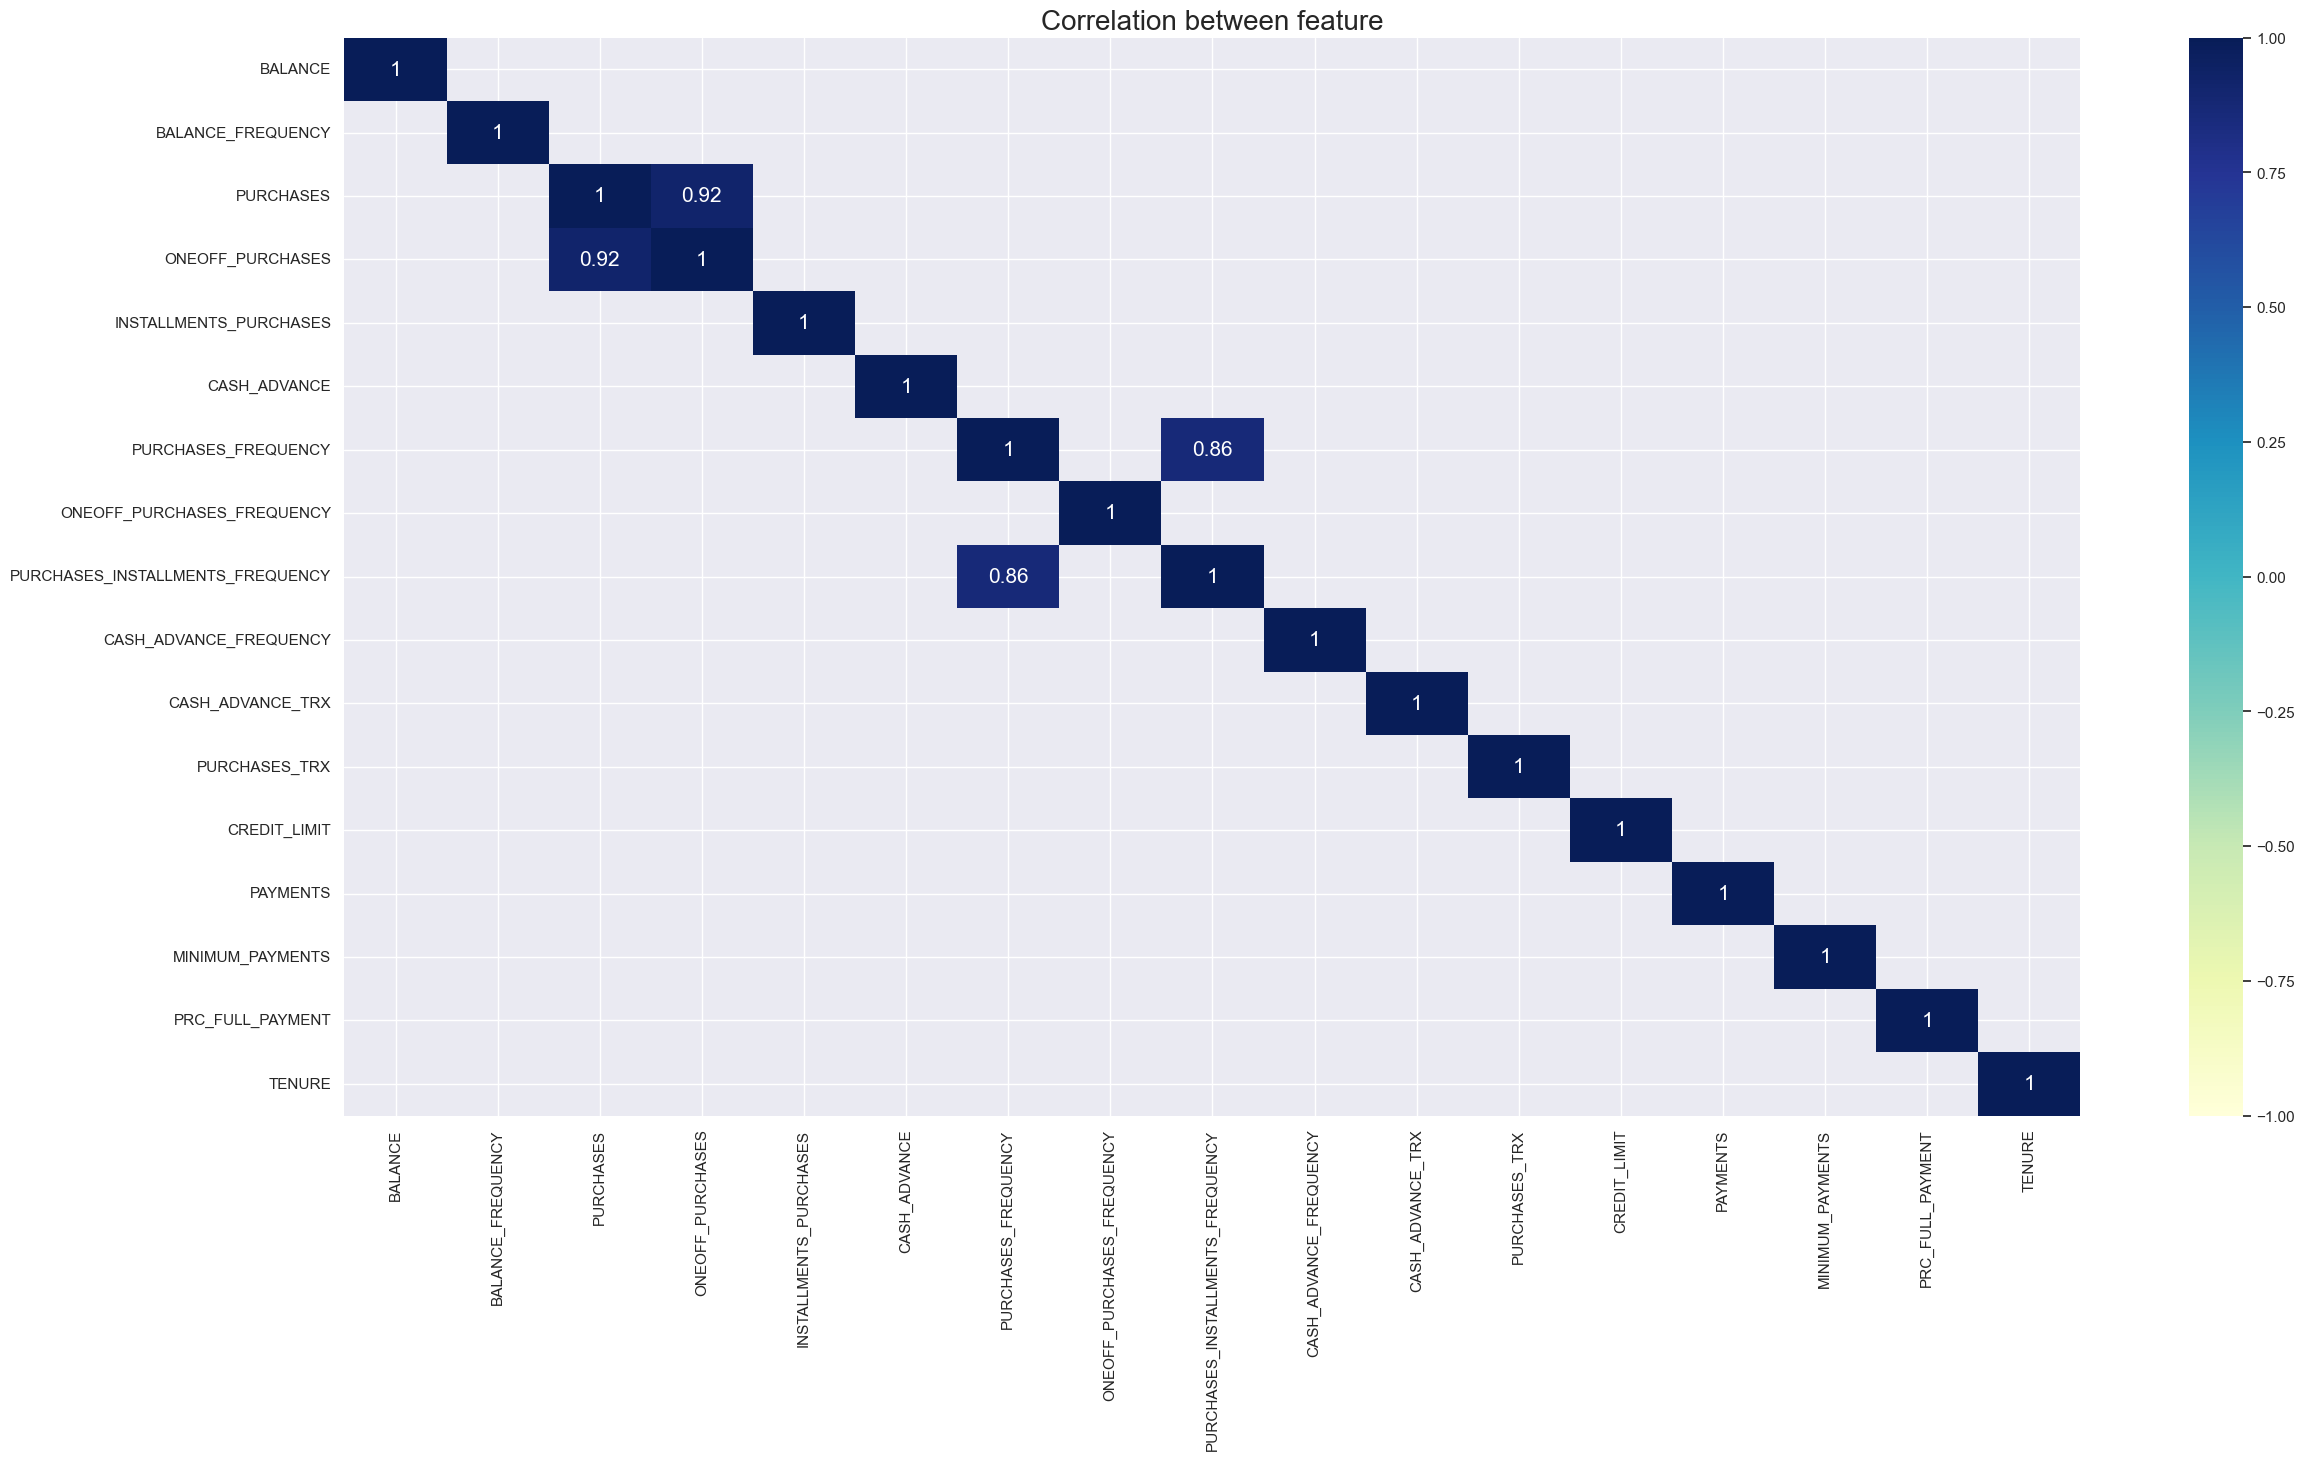

In [15]:
plt.figure(figsize=(28,14))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})
plt.title("Correlation between feature", fontsize=20)
plt.show()

In [16]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [17]:
from scipy import stats

In [18]:
from scipy.stats import zscore

In [19]:
z_scores = np.abs(zscore(data.drop(columns=['CUST_ID'])))
outliers = np.where(z_scores > 3)[0]
print("Indices of outliers:", outliers)

Indices of outliers: [   6   19   20 ... 8946 8947 8948]


In [20]:
data = data.drop(outliers)

## Drop Highly Correlated Variables

In [21]:
corr_threshold = 0.7
high_corr_vars = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > corr_threshold:
            colname = corr.columns[i]
            high_corr_vars.add(colname)

data.drop(columns=high_corr_vars, inplace=True)

In [22]:
data1=data.drop(columns=['CUST_ID', 'TENURE'])

In [23]:
data1 = data1.drop(['BALANCE_FREQUENCY'],axis = 1)
data1 = data1.drop(['CASH_ADVANCE_FREQUENCY'],axis = 1)
data1 = data1.drop(['PURCHASES_TRX'],axis = 1)

## Dimensionality Reduction

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
from sklearn.decomposition import PCA

In [26]:
x=data1.copy()

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [28]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [29]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

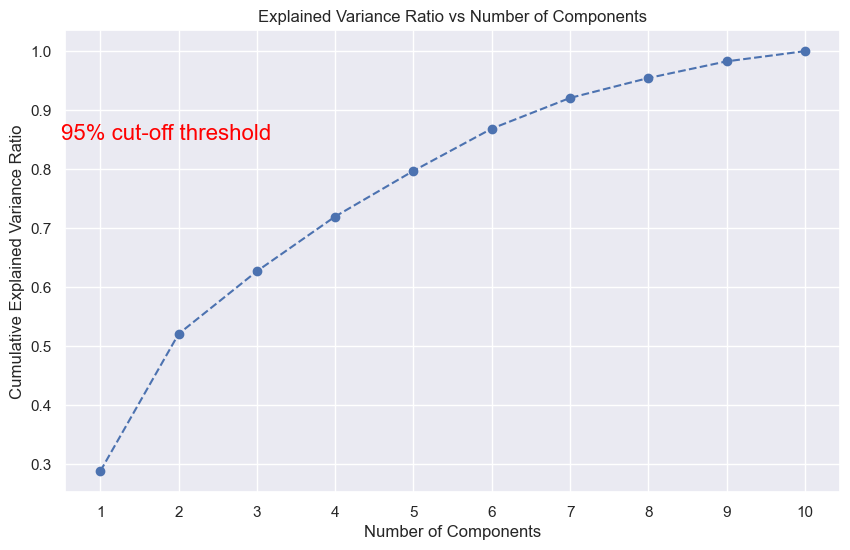

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xticks(np.arange(1, len(explained_variance_ratio_cumulative) + 1, step=1))
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.grid(True)
plt.show()

#### 95% Variance is explained at number of principal components = 9

In [31]:
pca=PCA(n_components=9, random_state=42)
principal_components=pca.fit_transform(x)

In [32]:
PCA_df = pd.DataFrame(data = principal_components, columns = ['PC' + str(i) for i in range(1,10)])

In [33]:
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-3734.107330,-224.237415,83.719154,-112.965389,194.191688,-36.655664,-31.468148,0.301944,-0.086071
1,4910.522850,3332.255507,-1229.204704,-3507.617846,1525.615005,1064.549114,31.599004,0.042869,0.178644
2,2910.328734,-1675.562640,1547.880013,-79.621790,-500.652436,-492.459710,-288.439703,-0.733595,-0.351483
3,2590.587862,-2343.939074,1314.569526,71.459419,-350.873466,494.489132,-633.284552,0.578447,0.026570
4,-3193.780707,240.534733,93.415091,-218.622786,-189.344063,-516.911365,-38.081140,0.281171,-0.044863


In [34]:
df_Kmeans = PCA_df.copy()

In [35]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Use Elbow Method

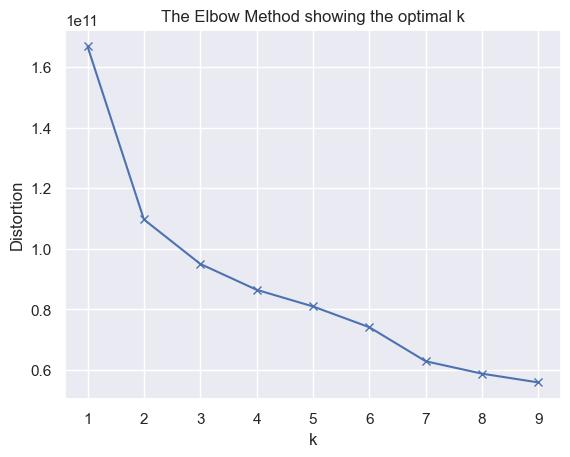

In [36]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_components)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### By using Elbow Method we found k = 4 as optimal number of clusters¶

## Use Silhouette_score

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
n_clusters = [2,3,4, 5,6,7,8]

for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(principal_components)
    
    score = silhouette_score(principal_components, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.44878089791236137)
For n_clusters = 3, silhouette score is 0.42270868084612007)
For n_clusters = 4, silhouette score is 0.42298608890529027)
For n_clusters = 5, silhouette score is 0.3290256545295345)
For n_clusters = 6, silhouette score is 0.3359559095841131)
For n_clusters = 7, silhouette score is 0.32506604449606297)
For n_clusters = 8, silhouette score is 0.3366107581548778)


#### By using silhouette method we found k = 4 as optimal number of clusters¶

#### Hence after performing two test we found number of clusters to be 4

## Build the Model¶

In [39]:
Kmodel = KMeans(n_clusters= 4, random_state= 10)

Kmodel.fit(principal_components)

KMeans(n_clusters=4, random_state=10)

In [40]:
df_Kmeans['Cluster'] = Kmodel.fit_predict(principal_components)

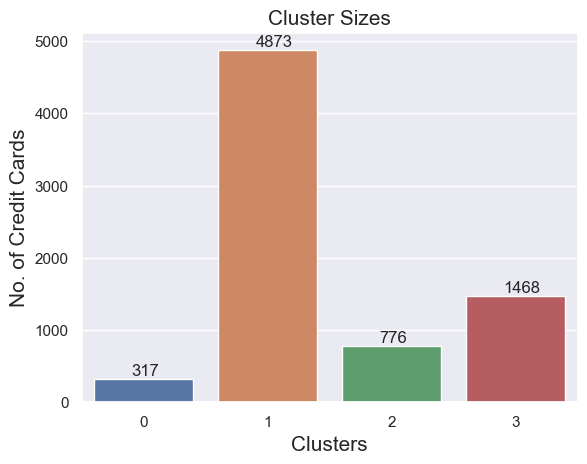

In [41]:
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

cl1 = np.unique(Kmodel.labels_, return_counts=True)[1][0] + 50
cl2 = np.unique(Kmodel.labels_, return_counts=True)[1][1] + 50
cl3 = np.unique(Kmodel.labels_, return_counts=True)[1][2] + 50
cl4 = np.unique(Kmodel.labels_, return_counts=True)[1][3] + 50

plt.text(x = -0.1, y =cl1, s = np.unique(Kmodel.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =cl2, s = np.unique(Kmodel.labels_, return_counts=True)[1][1])
plt.text(x = 1.90, y =cl3, s = np.unique(Kmodel.labels_, return_counts=True)[1][2])
plt.text(x = 2.90, y =cl4, s = np.unique(Kmodel.labels_, return_counts=True)[1][3])

plt.show()

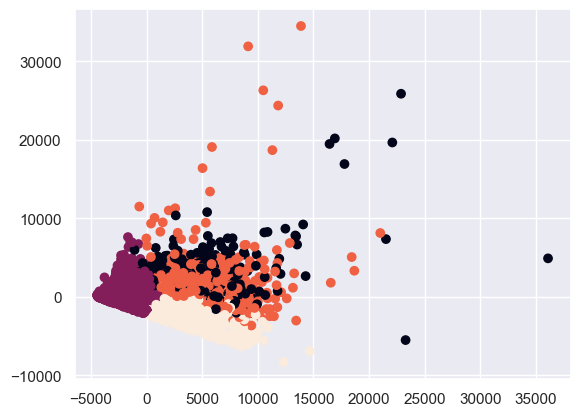

In [42]:
plt.scatter(df_Kmeans['PC1'],df_Kmeans['PC2'],c= df_Kmeans['Cluster'])

## Conclusion¶

In [43]:
data1['Cluster'] = df_Kmeans['Cluster']

In [44]:
centers = pd.DataFrame(Kmodel.cluster_centers_, columns=  df_Kmeans.columns[0:9])

In [45]:
centers

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,5152.302668,2928.893539,-4129.617609,3.659012,616.332102,-719.392857,79.892156,0.049036,-0.054089
1,-1979.323843,178.917237,-43.277716,-3.705609,-42.477929,2.126778,0.054210,0.007862,0.000299
2,4763.292186,1684.138679,1982.890505,-955.964609,-874.833952,136.204268,-9.418346,-0.041780,0.072945
3,2938.573356,-2119.222019,-14.127356,517.847325,471.277201,76.246102,-12.455299,-0.014582,-0.027939
